<a href="https://colab.research.google.com/github/domenico1995/SM/blob/main/SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
!pip install tensorflow_io
!pip install tensorflow
!pip install opencv-python
!pip install opencv-python-headless
!pip install Pillow


In [112]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input, Concatenate
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# directory/folder path
dir_path = r'/content/drive/MyDrive/database_sclere/database_sclere'
dir_path_dataset_indiano =r'/content/drive/MyDrive/database_sclere/database_sclere/Dataset indiano'
dir_path_dataset_italiano =r''

data = pd.DataFrame()

for file_path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, file_path)):
        data = pd.read_csv(os.path.join(dir_path, file_path))

data.columns = ['dati']
data.iloc[0]

dati    1;Caterina Antonacci;F;40;1979;
Name: ita;T_1;92317;92247;14, dtype: object

In [113]:
dataset_italiano = pd.DataFrame()
dataset_italiano.columns = []
d1=[];d2=[];d3=[];d4=[];d5=[];d6=[];d7=[];d8=[];d9=[]


In [114]:
for i in range(0, data.size, 1):
  string = data.index[i]
  s =string.split(";")
  if s[0] == "ita":
    d1.append(s[0]); d2.append(s[1]); d3.append(s[2]); d4.append(s[3]) ;d5.append(s[4])
    if len(s) > 5:
      d6.append(s[5]); d7.append(s[6]); d8.append(s[7]);
    else:
      dt =str(data['dati'].iloc[i])
      s1 = dt.split(";")
      d6.append(s1[1]); d7.append(s1[2]); d8.append(s1[3]);

In [115]:
dataset_italiano.insert(loc=0, column='Dataset', value=d1)
dataset_italiano.insert(loc=1, column='Paziente', value=d2)
dataset_italiano.insert(loc=2, column='Foto1', value=d3)
dataset_italiano.insert(loc=3, column='Foto2', value=d4)
dataset_italiano.insert(loc=4, column='Hb', value=d5)
dataset_italiano.insert(loc=5, column='Sesso', value=d7)
dataset_italiano.insert(loc=6, column='Eta', value=d8)
dataset_italiano['Hb'] = dataset_italiano['Hb'].astype(float)
dataset_italiano['Dataset'] = dataset_italiano['Dataset'].astype(str)
dataset_italiano.dtypes

Dataset      object
Paziente     object
Foto1        object
Foto2        object
Hb          float64
Sesso        object
Eta          object
dtype: object

In [116]:
dataset_indiano = pd.DataFrame()
dataset_indiano.columns = []
d1=[];d2=[];d3=[];d4=[];d5=[];d6=[];d7=[];d8=[];d9=[]

In [117]:
for i in range(0, data.size, 1):
  string = data.index[i]
  s =data.index[i].split(";")
  if s[0] == "ind":
    d1.append(s[0]); d2.append(s[1]); d3.append(s[2]); d4.append(s[3]); d5.append(s[4])
    if len(s) > 5:
      d6.append(s[6]);d7.append(s[7])
    else:
      dt =str(data['dati'].iloc[i])
      s1 = dt.split(";")
      d6.append(s1[2]);d7.append(s1[3])

In [118]:
dataset_indiano.insert(loc=0, column='Dataset', value=d1)
dataset_indiano.insert(loc=1, column='Paziente', value=d2)
dataset_indiano.insert(loc=2, column='Foto1', value=d3)
dataset_indiano.insert(loc=3, column='Foto2', value=d4)
dataset_indiano.insert(loc=4, column='Hb', value=d5)
dataset_indiano.insert(loc=5, column='Sesso', value=d6 )
dataset_indiano.insert(loc=6, column='Eta', value=d7 )
dataset_indiano['Hb'] = dataset_indiano['Hb'].astype(float)
dataset_indiano

,Dataset,Paziente,Foto1,Foto2,Hb,Sesso,Eta
0,ind,1,20200118_164759,20200118_164733,12.0,M,29
1,ind,2,20200124_154320,20200124_154319,8.0,F,36
2,ind,3,20200124_155439,20200124_155418,10.0,F,30
3,ind,4,20200124_160524,20200124_160522,8.0,F,39
4,ind,5,20200124_161455,20200124_161452,7.0,F,29
...,...,...,...,...,...,...,...
90,ind,91,20200302_231050,20200302_231057,13.0,M,21
91,ind,92,20200312_183626,20200312_183703,13.0,F,55
92,ind,93,20200315_161347,20200315_161348,12.0,M,29
93,ind,94,20200318_130148,20200318_130151,11.0,F,53


In [119]:
dataset_adu = pd.DataFrame()
dataset_adu.columns = []
d1=[];d2=[];d3=[];d4=[];d5=[];d6=[];d7=[];d8=[];d9=[]

In [120]:
for i in range(0, data.size, 1):
  string = data.index[i]
  s =string.split(";")
  if s[0] == "adu":
    d1.append(s[0]); d2.append(s[1]); d3.append(s[2]); d4.append(s[3]) ;d5.append(s[4])
    if len(s) > 5:
      d6.append(s[5]); d7.append(s[6]); d8.append(s[7]);
    else:
      dt =str(data['dati'].iloc[i])
      s1 = dt.split(";")
      d6.append(s1[1]); d7.append(s1[2]); d8.append(s1[3]);

In [121]:
dataset_adu.insert(loc=0, column='Dataset', value=d1)
dataset_adu.insert(loc=1, column='Paziente', value=d2)
dataset_adu.insert(loc=2, column='Foto1', value=d3)
dataset_adu.insert(loc=3, column='Foto2', value=d4)
dataset_adu.insert(loc=4, column='Hb', value=d5)
dataset_adu.insert(loc=5, column='Sesso', value=d7)
dataset_adu.insert(loc=6, column='Eta', value=d8)
dataset_adu['Hb'] = dataset_adu['Hb'].astype(float)
dataset_adu

,Dataset,Paziente,Foto1,Foto2,Hb,Sesso,Eta
0,adu,1,90755,90756,9.0,F,82
1,adu,2,91409,91408,10.0,F,77
2,adu,3,91622,91559,10.0,F,52
3,adu,4,91745,91743,11.0,F,73
4,adu,5,92209,92152,11.0,F,74
5,adu,6,101040,101031,15.0,F,77
6,adu,7,101258,101257,12.0,F,72
7,adu,8,105831,105828,14.0,M,84
8,adu,9,110508,110455,9.0,M,61
9,adu,10,110956,110931,12.0,M,70


In [122]:
dataset_onc = pd.DataFrame()
dataset_onc.columns = []
d1=[];d2=[];d3=[];d4=[];d5=[];d6=[];d7=[];d8=[];d9=[]

In [123]:
for i in range(0, data.size, 1):
  string = data.index[i]
  s =string.split(";")
  if s[0] == "onc":
    d1.append(s[0]); d2.append(s[1]); d3.append(s[2]); d4.append(s[3]) ;d5.append(s[4])
    if len(s) > 5:
      d6.append(s[5]); d7.append(s[6]); d8.append(s[7]);
    else:
      dt =str(data['dati'].iloc[i])
      s1 = dt.split(";")
      d6.append(s1[1]); d7.append(s1[2]); d8.append(s1[3]);

In [124]:
dataset_onc.insert(loc=0, column='Dataset', value=d1)
dataset_onc.insert(loc=1, column='Paziente', value=d2)
dataset_onc.insert(loc=2, column='Foto1', value=d3)
dataset_onc.insert(loc=3, column='Foto2', value=d4)
dataset_onc.insert(loc=4, column='Hb', value=d5)
dataset_onc.insert(loc=5, column='Sesso', value=d7)
dataset_onc.insert(loc=6, column='Eta', value=d8)
dataset_onc['Hb'] = dataset_onc['Hb'].astype(float)
dataset_onc

,Dataset,Paziente,Foto1,Foto2,Hb,Sesso,Eta
0,onc,O_01C,121623,121621,11.0,F,77
1,onc,O_02C,121832,121812,11.0,F,65
2,onc,O_03C,122134,122128,13.0,M,30
3,onc,O_04C,123021,123018,9.0,F,46
4,onc,O_05C,125520,125519,12.0,M,65
5,onc,O_06C,130005,130004,9.0,M,57
6,onc,O_07C,130235,130232,9.0,M,56
7,onc,O_08C,130432,130430,8.0,M,53
8,onc,O_09C,130814,130807,8.0,M,60
9,onc,O_10C,130959,130957,9.0,M,59


In [125]:
dataset = pd.concat([dataset_italiano, dataset_indiano, dataset_adu, dataset_onc], ignore_index=True)
print(dataset)

    Dataset Paziente   Foto1   Foto2    Hb Sesso Eta
0       ita      T_1   92317   92247  14.0     F  40
1       ita      T_2   93707   93702  13.0     F  34
2       ita      T_3   94015   94012  14.0     M  53
3       ita      T_4   95329   95326  15.0     M  36
4       ita      T_5   74439   74432  13.0     M  51
..      ...      ...     ...     ...   ...   ...  ..
212     onc    O_10C  130959  130957   9.0     M  59
213     onc    O_11C   91410   91408  15.0     M  22
214     onc    O_12C   91505   91502  10.0     F  76
215     onc    O_13C   93333   93332  12.0     F  70
216     onc    O_14C  110116  110115  14.0     F  54

[217 rows x 7 columns]


In [126]:
# Definisci le funzioni di classificazione direttamente
def definisci_anemia(row):
    if row['Hb'] >= 13.0:
        return 1
    else:
        return 0

def definisci_anemia_lieve(row):
    if (row['Sesso'] == 'M' and 11.0 <= row['Hb'] <= 12.9) or \
       (row['Sesso'] == 'F' and 11.0 <= row['Hb'] <= 11.9):
        return 1
    else:
        return 0

def definisci_anemia_moderata(row):
    if 8.0 <= row['Hb'] <= 10.9:
        return 1
    else:
        return 0

def definisci_anemia_grave(row):
    if row['Hb'] < 8.0:
        return 1
    else:
        return 0

def definisci_sesso(row):
    if row['Sesso'] == 'F':
        return 1
    else:
        return 0


In [127]:
dataset['Nessuna'] = dataset.apply(definisci_anemia, axis=1)
dataset['Grave'] = dataset.apply(definisci_anemia_grave, axis=1)
dataset['Moderata'] = dataset.apply(definisci_anemia_moderata, axis=1)
dataset['Lieve'] = dataset.apply(definisci_anemia_lieve, axis=1)
dataset['Sesso'] = dataset.apply(definisci_sesso, axis=1)
dataset.insert(loc=0, column='Indice', value=dataset.index+1)
dataset.iloc[1]

Indice          2
Dataset       ita
Paziente      T_2
Foto1       93707
Foto2       93702
Hb           13.0
Sesso           1
Eta            34
Nessuna         1
Grave           0
Moderata        0
Lieve           0
Name: 1, dtype: object

In [128]:
def elenca_file_cartelle(directory):
    lista_file_cartelle = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            lista_file_cartelle.append(os.path.join(root, file))


    return lista_file_cartelle


In [129]:
directory_da_esplorare = r'/content/drive/MyDrive/database_sclere/database_sclere/'
lista = elenca_file_cartelle(directory_da_esplorare)
type(lista)


list

In [130]:
lista = [elemento for elemento in lista if "Dataset congiuntive gruppo anemia  organizzato 28 mar" not in elemento]


In [131]:
elementi = [file for file in lista if os.path.splitext(file)[1] == '.jpg']
print(elementi[1])

/content/drive/MyDrive/database_sclere/database_sclere/Dataset indiano/1-Vishnu-20200118_164733/20200118_164733.jpg


In [132]:
import pandas as pd

# Crea un elenco vuoto per ogni colonna
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
d7 = []
d8 = []
d9 = []
d10 = []
d11 = []

for stringa in elementi:
    d1.append(stringa)
    s = stringa.replace(".jpg", "")
    d2.append(s + '_conjunctive_line.png')
    d3.append(s + '_forniceal.png')
    d4.append(s + '_forniceal_palpebral.png')
    d5.append(s + '_forniceal_palpebral_line.png')
    d6.append(s + '_palpebral.png')
    d7.append(s + '_sclera.png')
    d8.append(s + '_sclera_kmeans.png')
    d9.append(s + '_sclera_ncut.png')
    d10.append(s + '_sclera_vessels_auto.png')
    d11.append(s + '_sclera_vessels_auto_centerline.png')

# Crea il DataFrame direttamente
colonne = ['Occhio', 'Conjunctive_line', 'Forniceal', 'Forniceal_palpebral', 'Forniceal_palpebral_line', 'Palpebral',
           'Sclera', 'Sclera_kmeans', 'Sclera_ncut', 'Sclera_vessels_auto', 'Sclera_vessels_auto_centerline']
lista_sclera = pd.DataFrame(list(zip(d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11)), columns=colonne)

# Verifica i tipi di dati delle colonne
tipi_colonne = lista_sclera.dtypes
print(tipi_colonne)


Occhio                            object
Conjunctive_line                  object
Forniceal                         object
Forniceal_palpebral               object
Forniceal_palpebral_line          object
Palpebral                         object
Sclera                            object
Sclera_kmeans                     object
Sclera_ncut                       object
Sclera_vessels_auto               object
Sclera_vessels_auto_centerline    object
dtype: object


In [133]:
lista_sclera.iloc[1]
lista_sclera.dtypes

Occhio                            object
Conjunctive_line                  object
Forniceal                         object
Forniceal_palpebral               object
Forniceal_palpebral_line          object
Palpebral                         object
Sclera                            object
Sclera_kmeans                     object
Sclera_ncut                       object
Sclera_vessels_auto               object
Sclera_vessels_auto_centerline    object
dtype: object

In [134]:
def trova_occhio_corrispondente(row):
    for occhio in lista_sclera['Occhio']:
        if row['Foto1'] in occhio or row['Foto2'] in occhio:
            return occhio
    return None

# Applica la funzione a ciascuna riga di dataset
dataset['Occhio_percorso'] = dataset.apply(trova_occhio_corrispondente, axis=1)

In [135]:
merged_df = dataset.merge(lista_sclera, left_on='Occhio_percorso', right_on='Occhio', how='inner')
merged_df = merged_df.drop('Occhio_percorso', axis=1)
merged_df = merged_df.drop('Foto1', axis=1)
merged_df = merged_df.drop('Foto2', axis=1)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Indice                          187 non-null    int64  
 1   Dataset                         187 non-null    object 
 2   Paziente                        187 non-null    object 
 3   Hb                              187 non-null    float64
 4   Sesso                           187 non-null    int64  
 5   Eta                             187 non-null    object 
 6   Nessuna                         187 non-null    int64  
 7   Grave                           187 non-null    int64  
 8   Moderata                        187 non-null    int64  
 9   Lieve                           187 non-null    int64  
 10  Occhio                          187 non-null    object 
 11  Conjunctive_line                187 non-null    object 
 12  Forniceal                       187 

In [136]:
def path_exists(path):
    return os.path.exists(path)
image_columns = ['Occhio', 'Forniceal', 'Forniceal_palpebral', 'Palpebral', 'Sclera', 'Sclera_kmeans', 'Sclera_ncut', 'Sclera_vessels_auto', 'Sclera_vessels_auto_centerline']

for column in image_columns:
    merged_df = merged_df[merged_df[column].apply(path_exists)]

In [137]:
file_csv = 'dataset.csv'
merged_df.to_csv(file_csv, index=False)

In [142]:
import cv2
import numpy as np
import pandas as pd

def estrai_pallore_congiuntiva(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresholded = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)
        pallore_congiuntiva = cv2.bitwise_and(img, img, mask=mask)
        return pallore_congiuntiva
    else:
        return None

df = pd.read_csv('dataset.csv')
d = pd.DataFrame()

età = []
sesso = []
immagini_pallore_congiuntiva = []

for index, row in df.iterrows():
    img_path = row['Occhio']
    img = cv2.imread(img_path)

    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_TRIANGLE)
        entropy = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        entropy = cv2.bitwise_not(entropy)
        pallore_congiuntiva = estrai_pallore_congiuntiva(img)

        età.append(row['Eta'])
        sesso.append(row['Sesso'])

        immagini_pallore_congiuntiva.append(pallore_congiuntiva)
    else:
        print(f"Errore: Immagine non trovata per il percorso '{img_path}'")

d['Eta'] = età
d['Sesso'] = sesso
d['Immagine_Pallore_Congiuntiva'] = immagini_pallore_congiuntiva

d.to_csv('dataset_aggiornato.csv', index=False)


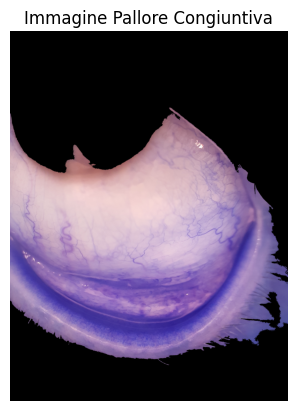

In [143]:
import matplotlib.pyplot as plt

# Assicurati che il dataframe sia stato creato correttamente e contenga l'immagine
if not d.empty and 'Immagine_Pallore_Congiuntiva' in d.columns:
    # Ottieni l'immagine del pallore della congiuntiva dalla prima riga
    prima_immagine_pallore = d.loc[0, 'Immagine_Pallore_Congiuntiva']

    # Verifica se l'immagine non è nulla
    if prima_immagine_pallore is not None:
        # Visualizza l'immagine
        plt.imshow(prima_immagine_pallore, cmap='gray')
        plt.title('Immagine Pallore Congiuntiva')
        plt.axis('off')
        plt.show()
    else:
        print("L'immagine del pallore della congiuntiva nella prima riga è vuota.")
else:
    print("Il dataframe è vuoto o non contiene la colonna 'Immagine_Pallore_Congiuntiva'.")
